In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
import string
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import numpy as np
#nltk.download('popular')

In [ ]:
#!pip install plot_keras_history
from plot_keras_history import show_history, plot_history

In [ ]:
dict_df = pd.read_excel('/content/hateSpeech.xlsx',
                   sheet_name=['HostileNeutral','HateOffensive'])
df = dict_df.get('HostileNeutral')
df2 = dict_df.get('HateOffensive')

In [ ]:
def NeuralNetwork(df):
  dfIn=pd.DataFrame(df.iloc[:,0])

  N=len(dfIn)

  for i in range(0,len(dfIn)):
    sentence=df.loc[i,"Sentence"]
    sentence =sentence.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(sentence)

    for token in tokens:
      token=token.lower()
      if not token in dfIn.columns:
        dfIn[token]=0;
      dfIn.loc[i,token]+=1;

  dfIn.drop("Sentence",axis=1,inplace=True)

  y=np.array(df.iloc[:,1]).flatten()
  dfIn, X_test, y_train, y_test = train_test_split(dfIn, y, test_size=0.25, random_state=42)
  cols=len(dfIn.iloc[0])
  rows=len(dfIn)
  len(y_train)
  dfIn = dfIn.to_numpy()
  y_train[y_train=='H']=1
  y_train[y_train=='N']=0
  y_train[y_train=='N ']=0
  y_train[y_train=='O']=0
  y_train[y_train=='O ']=0
  dfIn = np.asarray(dfIn).astype('float32')

  no_output_neurons = 2

  #we have 2 hidden layers in this neural network,
  first_hiddenLayer = 500
  second_hiddenLayer = 250

  dfIn =tf.convert_to_tensor(dfIn, dtype=tf.float32)
  y_train =tf.convert_to_tensor(y_train, dtype=tf.float32)

  model = keras.Sequential([
      keras.layers.Dense(first_hiddenLayer, input_shape=(None,dfIn.shape[0],dfIn.shape[1]), activation='relu'),
      keras.layers.Dense(second_hiddenLayer, activation='relu'),
      keras.layers.Dense(no_output_neurons, activation='sigmoid')
  ])


  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])




  iterations = 20

  history = model.fit(dfIn, y_train,verbose=0, epochs=iterations)

  X_test = X_test.to_numpy()

  y_test[y_test=='H']=1
  y_test[y_test=='N']=0
  y_test[y_test=='N ']=0
  y_test[y_test=='O']=0
  y_test[y_test=='O ']=0

  X_test =tf.convert_to_tensor(X_test, dtype=tf.float32)
  y_test =tf.convert_to_tensor(y_test, dtype=tf.float32)

  loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

  plot_history(history)

  return accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


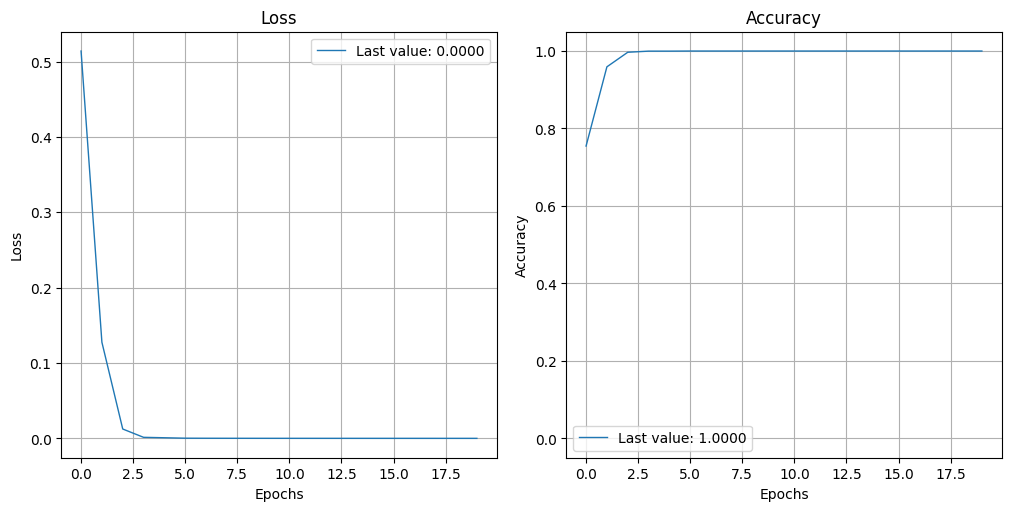

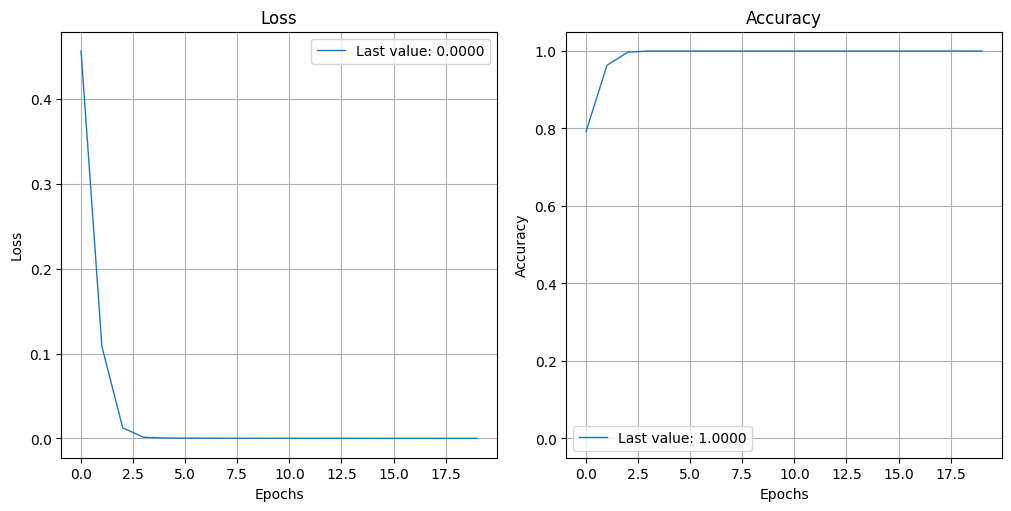

In [ ]:
accuracy1 = NeuralNetwork(df)
accuracy2 = NeuralNetwork(df2)

In [ ]:
print("Testing Accuracy For First Dataset:  {:.4f}".format(accuracy1))
print("Testing Accuracy For Second Dataset:  {:.4f}".format(accuracy2))

Testing Accuracy For First Dataset:  0.7808
Testing Accuracy For Second Dataset:  0.8589
